
<br>

*Elaborado por Daniel Salmoran* <br> *Economista*

<br>



# 1. Introducción a los elementos de la librería **yfinance**: <br> **Análisis individual de una acción.**

## En este apartado se muestra la forma de acceder a la **información financiera y corporativa** de la empresa, como el sector e industria en que participa; sus estados contables, como el balance general o el estado de resultados; y el **precio de sus acciones**.

## Al final de este apartado se utiliza la librería **[mplfinance](https://github.com/matplotlib/mplfinance/tree/master)** para realizar gráficas de velas.

<br>

---

<br>

El primer paso es instalar las paqueterías:




In [ ]:
!pip install yfinance
!pip install mplfinance

<br>

Ahora importamos las librerías con nombres abreviados:

In [2]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf

<br>

Definimos el objeto *empresa* con ayuda de la Clase **Ticker** de la librería. Debemos colocar entre comillas el [ticker](https://economipedia.com/definiciones/simbolo-ticker.html) de la empresa a analizar:

In [3]:
empresa= yf.Ticker("AMD")

<br>

Podemos obtener la información financiera y corporativa de la empresa utilizando los [métodos](https://yfinance-python.org/reference/yfinance.stock.html) establecidos dentro de **yfinance**:


In [4]:
# "info" es un diccionario que contiene la información corporativa de la empresa:
info= empresa.get_info()

# "income_stmt" es un pd.DataFrame que contiene la información del Estado de Resultado "Income Statment":
income= empresa.get_income_stmt(pretty= True, freq='quarterly').iloc[::-1]    #default freq 'yearly'    #invertimos el orden de la tabla con .iloc

# "balance_sheet" es un pd.DataFrame que contiene la información del Balance General "Balance Sheet":
balance= empresa.get_balance_sheet(pretty= True, freq='quarterly').iloc[::-1]

# "income_stmt" es un pd.DataFrame que contiene la información del Estado de Resultado "Cash Flow Statement":
cashflow= empresa.get_cashflow(pretty= True, freq='quarterly').iloc[::-1]

# "get_earnings_dates" es un pd.DataFrame que contiene las fechas de los EPS estimados y reportados la empresa:
eps_info= empresa.get_earnings_dates()


<br>

Para  visualizar el contenido llamamos a la variable:

In [5]:
#por ejeo, 'balance'
balance

,2024-12-31,2024-09-30,2024-06-30,2024-03-31,2023-12-31,2023-09-30
Cash And Cash Equivalents,3787000000.0,3897000000.0,4113000000.0,4190000000.0,3933000000.0,NaN
Other Short Term Investments,1345000000.0,647000000.0,1227000000.0,1845000000.0,1840000000.0,NaN
Cash Cash Equivalents And Short Term Investments,5132000000.0,4544000000.0,5340000000.0,6035000000.0,5773000000.0,NaN
Accounts Receivable,6192000000.0,7241000000.0,5749000000.0,5038000000.0,4323000000.0,NaN
Duefrom Related Parties Current,113000000.0,29000000.0,24000000.0,31000000.0,9000000.0,NaN
...,...,...,...,...,...,...
Tangible Book Value,13799000000.0,12574000000.0,12138000000.0,11195000000.0,10267000000.0,NaN
Total Debt,2212000000.0,2238000000.0,2245000000.0,2998000000.0,3003000000.0,NaN
Share Issued,1680000000.0,1678000000.0,1668000000.0,1666000000.0,1663000000.0,NaN
Ordinary Shares Number,1622000000.0,1623000000.0,1618000000.0,1618000000.0,1616000000.0,NaN


<br>

En el caso de la variable *eps_info*, podemos observar en el resultado que la fecha tiene agregada la zona horaria. Para quitar ese componente se utiliza la siguiente línea de código:

In [6]:
eps_info= eps_info.tz_localize(None)   #el resultado está en hora de New York (UTC-4), o EDT
eps_info

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2026-02-02 16:00:00,NaN,NaN,NaN
2025-10-27 16:00:00,NaN,NaN,NaN
2025-07-28 06:59:00,NaN,NaN,NaN
2025-05-06 16:00:00,NaN,NaN,NaN
2025-02-04 16:16:00,1.08,1.09,1.14
2024-10-29 16:18:00,0.92,0.92,0.50
2024-07-30 16:00:00,0.68,0.69,2.04
2024-04-30 16:15:00,0.61,0.62,1.75
2024-01-30 16:17:00,0.77,0.77,-0.32


<br>

Si se requiere trabajar con cualquier pd.DataFrame generado hasta aquí en Excel, la línea de código para descargar es:

In [7]:
#por ejemplo, 'balance'
balance.to_excel('informacion_de_la_empresa.xlsx')   # se puede modificar el nombre del archivo pero se debe respetar la extencion '.xlsx'



<br>

El procedimiento para obtener los precios de apertura, máximo, mínimo y cierre de la empresa es el siguiente:

In [8]:
data= empresa.history(period= 'YTD', interval= '1d')

#data= yf.Ticker(empresa).history(start="2025-01-01", end="2025-12-31")     #se puede consultar información de un intervalo en especifico

#ajustamos el resultado eliminando el componente de time-zone del indice
data = data.tz_localize(None)

#nos aseguramos de declarar el formato de fecha en los datos del indice
data.index = pd.to_datetime(data.index, format= '%Y-m%-d% %H:%M:%S')

#cambiamos el nombre de la primera columna a 'Fecha'
data.index.name = 'Fecha'

<br>

Los datos obtenidos son los siguientes:


In [9]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Fecha,,,,,,,
2025-01-02,122.290001,123.139999,119.440002,120.629997,34256200,0.0,0.0
2025-01-03,121.650002,125.559998,121.419998,125.370003,36785300,0.0,0.0
2025-01-06,129.070007,130.729996,127.360001,129.550003,48020200,0.0,0.0
2025-01-07,130.509995,131.710007,126.849998,127.330002,39220400,0.0,0.0
2025-01-08,124.510002,125.300003,120.120003,121.839996,46723100,0.0,0.0
...,...,...,...,...,...,...,...
2025-04-25,93.279999,97.099998,92.849998,96.650002,28575300,0.0,0.0
2025-04-28,95.580002,97.489998,94.269997,96.389999,30456700,0.0,0.0
2025-04-29,95.760002,97.180000,95.330002,96.059998,20700600,0.0,0.0


Para descargar la tabla de los precios de la acción como archivo Excel, se usa:

In [10]:
data.to_excel('acciones_de_la_empresa.xlsx')

<br>

Por último, se pueden graficar los precios de cotización de la empresa (OHLC) haciendo uso de la librería especializada **mplfinance**. Para conocer los detalles de personalizacion de las gráficas, pueden hacer click [aquí](https://github.com/matplotlib/mplfinance/tree/master). <br>

A continuación se muestra la *Gráfica 1* de velas, con el  estilo predefinido **"default"**:


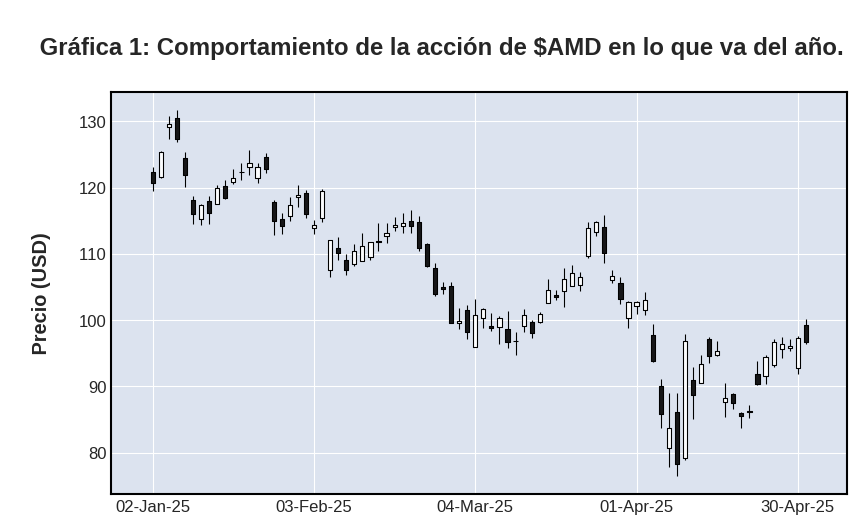

In [11]:
#declaramos la grafica y ajustamos los parametros
mpf.plot(data,                    #IMPORTANTE: 'data' debe ser un Pandas DataFrame
         type= "candlestick",     #algunos tipos de grafica son: de linea (line) y de vela (candlestick)
         style= "default",        #algunos estilos son: binance, blueskies, classic, default, nightclouds & yahoo
         title= "\n Gráfica 1: Comportamiento de la acción de $AMD en lo que va del año.",
         ylabel ="\n Precio (USD) \n",
         datetime_format= '%d-%b-%y',
         figscale= 1,
         figratio=(16, 9),
         xrotation= 0)
         #linecolor='#00ff00')        #en caso de ser una grafica de linea, se puede modificar su color
         #savefig='figura1.png')      #se puede descargar la grafica habilitando esta propiedad

<br>

En la Gráfica 2, se usa el estilo predefinido de **"nightclouds"**:

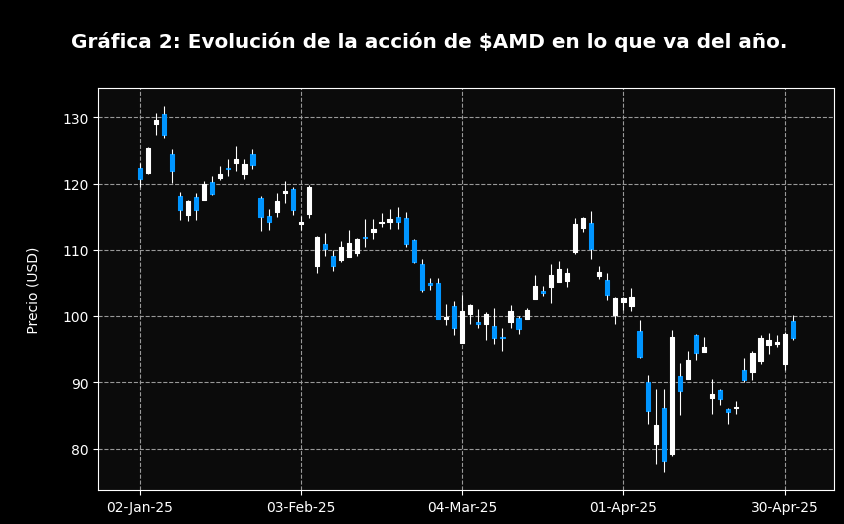

In [12]:
#declaramos la grafica y ajustamos los parametros
mpf.plot(data,                    #IMPORTANTE: 'data' debe ser un Pandas DataFrame
         type= "candlestick",     #algunos tipos de grafica son: de linea (line) y de vela (candlestick)
         style= "nightclouds",    #algunos estilos disponibles son: binance, blueskies, classic, default, nightclouds & yahoo
         title= "\n Gráfica 2: Evolución de la acción de $AMD en lo que va del año.",
         ylabel ="\n Precio (USD) \n",
         datetime_format= '%d-%b-%y',
         figscale= 1,
         figratio=(16, 9),
         xrotation= 0)
         #linecolor='#1E90FF')        #en caso de ser una grafica de linea, se puede modificar su color
         #savefig='figura1.png')      #se puede descargar la grafica habilitando este atributo